<a href="https://colab.research.google.com/github/NorrisPau/ACO/blob/master/BERT_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')
root_path = "/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Read in Data

In [ ]:
!pip install bertopic

In [ ]:
!pip install matplotlib

In [7]:
import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib as plt
import nltk
nltk.download('stopwords')
from bertopic import BERTopic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
raw_data = pd.read_csv("/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien/data/raw/okcupid_profiles.csv")

In [9]:
#Extract essay 0 (about me) to a list
df = raw_data[raw_data.essay0.notnull()]

In [96]:
df["sex"].value_counts()
#m    32648
#f    21810

m    32648
f    21810
Name: sex, dtype: int64

In [22]:
3264/10838

0.30116257612105557

In [23]:
#We see that we have more male profile texts than female, lets randomly delete some males, so we have same distribution
#32648-21810 = 10838 needs to be dropped from male, 3264/10838 = 0.3011 (30%)
df_sub = df.drop(df[df['sex'] == "m"].sample(frac=3264/10838).index)


In [56]:
df_sub["sex"].value_counts()

m    22816
f    21810
Name: sex, dtype: int64

AttributeError: ignored

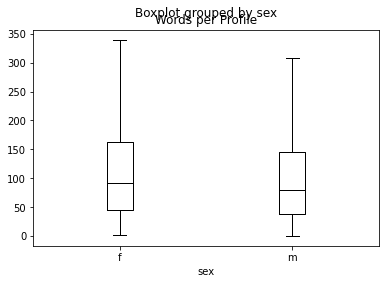

In [57]:
#How long are the profile texts?
df_sub["Words per Profile"] = df_sub["essay0"].str.split().apply(len)
df_sub.boxplot("Words per Profile", by="sex", grid=False, showfliers=False,
           color="black")
plt.show()
#Very similar lengths from 50-150 words per profile text, female have a slightly higher average

In [97]:
from nltk.corpus import stopwords
stopwords =  nltk.corpus.stopwords.words('english')
stopwords=set(stopwords)


def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

In [98]:
essay_0_lst = list(df_sub["essay0"])

In [99]:
essay_0_lst_stop = remove_stopwords(essay_0_lst)

In [100]:
essay_0_lst_stop[0:10]

["chef: means. 1. workaholic. 2. love cook regardless whether work. 3. love drink eat foods probably really bad me. 4. love around people resemble line 1-3. love outdoors avid skier. snowing tahoe least. confident friendly. i'm interested acting typical guy. time patience rediculous acts territorial pissing. overall likable easygoing individual. adventurous always looking forward new things hopefully sharing right person.",
 "i'm ashamed much, writing public text online dating site makes pleasantly uncomfortable. i'll try earnest possible noble endeavor standing naked world. i've lived san francisco 15 years, love find frustrated deficits. lots great friends acquaintances (which increases apprehension put anything site), i'm feeling like meeting new people friends friends. okay friend friend too. chances are, make complex filtering process multiple choice questions, lifestyle statistics, photo scanning, indulgent blurbs text without moving quickly another search result, probably alread

# Get topic probabilities 

In [180]:
# create model
topic_model = BERTopic(top_n_words = 20, language="english", calculate_probabilities=True, verbose=True)

In [181]:
topics, probs = topic_model.fit_transform(essay_0_lst_stop)

Batches:   0%|          | 0/1395 [00:00<?, ?it/s]

2022-05-23 21:07:06,187 - BERTopic - Transformed documents to Embeddings
2022-05-23 21:08:04,140 - BERTopic - Reduced dimensionality
2022-05-23 21:10:17,043 - BERTopic - Clustered reduced embeddings


In [ ]:
# Look at highest topic per gender
len(probs)
len(df["sex"]) #54458
len(topics) #54458
plt.bar()

In [182]:
topic_model.get_topic_info().head(30)

,Topic,Count,Name
0,-1,34138,-1_im_love_like_life
1,0,419,0_loyal_smart_sassy_sooncoming
2,1,347,1_dating_online_site_meet
3,2,329,2_nerd_geek_nerdy_games
4,3,326,3_laugh_humor_funny_laughing
5,4,302,4_think_im_like_use
6,5,289,5_camping_biking_bike_hiking
7,6,253,6_ive_im_life_world
8,7,228,7_trip_travel_america_europe
9,8,211,8_someone_im_looking_meet


Out of 54458 texts, 33810	(60%) have the same topic! That could be a reason why we cannot predict well sex from the topic proabbilities. 

In [183]:
sex = list(df_sub["sex"])

In [184]:
len(sex)

44626

In [185]:
topics_per_class = topic_model.topics_per_class(essay_0_lst_stop, topics, sex)

2it [00:02,  1.35s/it]


In [186]:
topics_per_class

,Topic,Words,Frequency,Class
0,-1,"love, im, like, life, people",16791,f
1,0,"sassy, sooncoming, loyal, smart, thoughtful",219,f
2,1,"online, dating, site, meet, date",186,f
3,2,"nerd, geek, nerdy, games, science",120,f
4,3,"laugh, humor, funny, laughing, sarcasm",174,f
...,...,...,...,...
443,218,"hipster, hipsters, billiardspool, indiehipster...",6,m
444,219,"student, starcraft, play, ii, colleges",6,m
445,220,"mexican, name, keyboardspiano, 33yr, tali",8,m
446,221,"fairytails, findbut, change, steppin, epics",4,m


#Look at probability 
The variable probabilities that is returned from transform() or fit_transform() can be used to understand how confident BERTopic is that certain topics can be found in a document.

In [190]:
topic_model.visualize_distribution(probs[200], min_probability=0.0051)

In [109]:
len(topics)

44626

I think the neural network cannot predict sex, because the topic probabilitites 

# Topics per Class: Sex

In [191]:
len(essay_0_lst_stop)

44626

In [135]:
topics_per_class = topic_model.topics_per_class(essay_0_lst_stop, topics, classes=sex)

2it [00:24, 12.23s/it]


In [192]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10, width=900)

In [193]:
topic_model.visualize_hierarchy(top_n_topics=20, width=800)

# Build pytorch Neural Net to predict sex from topic probabilities 

Tutorial: https://towardsdatascience.com/pytorch-basics-intro-to-dataloaders-and-loss-functions-868e86450047

## TrainTTest Split

In [194]:
len(df_sub["sex"])

44626

In [195]:
df_sub['fem'] = np.where(df_sub['sex'] == "f", 1, 0)

In [196]:
df_sub["fem"]

1        0
2        0
3        0
5        0
6        1
        ..
59941    1
59942    0
59943    0
59944    0
59945    0
Name: fem, Length: 44626, dtype: int64

In [197]:
len(probs)

44626

In [198]:
X_train, X_test, y_train, y_test = train_test_split(probs, df_sub["fem"], test_size=0.33, random_state=42) #random state to m

In [199]:
X_train.shape #29899 probs for 208 topics

(29899, 223)

In [200]:
X_train = torch.from_numpy(X_train)
y_train = y_train.to_numpy()
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = y_test.to_numpy()
y_test = torch.from_numpy(y_test)

In [201]:
import torch
import torch.nn as nn

In [202]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [217]:
# 1. Construct a model class that subclasses nn.Module
class NeuralNetwork_binary(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=223, out_features=300) # takes in 231 features (X), produces 500 features QUESTION: How many output features here (meaning how many hidden layers?)
        #self.layer_2 = nn.Linear(in_features=300, out_features=300)
        self.layer_2 = nn.Linear(in_features=300, out_features=1) # takes in 500 features, produces 1 feature (y)
        self.relu = nn.ReLU() # <- add in ReLU activation function

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.relu((self.relu(self.layer_1(x)))))

In [218]:
# 4. Create an instance of the model and send it to target device
model_0 = NeuralNetwork_binary().to(device)
model_0

NeuralNetwork_binary(
  (layer_1): Linear(in_features=223, out_features=300, bias=True)
  (layer_2): Linear(in_features=300, out_features=1, bias=True)
  (relu): ReLU()
)

In [219]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [220]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [221]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device TODO: What does that mean?
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [222]:
# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train.float()).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train.float())
    acc = accuracy_fn(y_true=y_train.float(),
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test.float()).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test.float())
        test_acc = accuracy_fn(y_true=y_test.float(),
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69299, Accuracy: 50.86% | Test loss: 0.69282, Test acc: 51.60%
Epoch: 10 | Loss: 0.69298, Accuracy: 50.86% | Test loss: 0.69278, Test acc: 51.59%
Epoch: 20 | Loss: 0.69297, Accuracy: 50.86% | Test loss: 0.69275, Test acc: 51.58%
Epoch: 30 | Loss: 0.69297, Accuracy: 50.86% | Test loss: 0.69273, Test acc: 51.58%
Epoch: 40 | Loss: 0.69297, Accuracy: 50.86% | Test loss: 0.69272, Test acc: 51.58%
Epoch: 50 | Loss: 0.69297, Accuracy: 50.86% | Test loss: 0.69271, Test acc: 51.61%
Epoch: 60 | Loss: 0.69297, Accuracy: 50.86% | Test loss: 0.69271, Test acc: 51.61%
Epoch: 70 | Loss: 0.69296, Accuracy: 50.89% | Test loss: 0.69270, Test acc: 51.61%
Epoch: 80 | Loss: 0.69296, Accuracy: 50.89% | Test loss: 0.69270, Test acc: 51.61%
Epoch: 90 | Loss: 0.69296, Accuracy: 50.89% | Test loss: 0.69270, Test acc: 51.61%
